In [ ]:
import PIL
from PIL import Image

In [ ]:
from IPython.display import display #to display image


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.12.0


In [ ]:
# Generate Random R,G,B value 
import random
def generate_random_rgb(): 
    return (int(random.uniform(0,255)), int(random.uniform(0,255)), int(random.uniform(0,255)))

In [ ]:
# Create a new image with the given size
def create_image(i, j):
  image = Image.new("RGB", (i, j), color=generate_random_rgb())
  return image

# Get the pixel from the given image
def get_pixel(image, i, j):
  # Inside image bounds?
  width, height = image.size
  if i > width or j > height:
    return None
  # Get Pixel
  pixel = image.getpixel((i, j))
  return pixel

In [ ]:
#Load model from github into colab
import os
import urllib.request
urllib.request.urlretrieve('https://github.com/AjinkyaChavan9/RGB-Color-Classifier-with-Deep-Learning-using-Keras-and-Tensorflow/blob/master/RGB%20Color%20Classifier%20ML%20Model/colormodel_trained_89.h5?raw=true', 'colormodel_trained_89.h5')

('colormodel_trained_89.h5', <http.client.HTTPMessage at 0x7f922bca2530>)

In [ ]:
ls

colormodel_trained_89.h5  sample_data/


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_trained_89.h5') 

# Show the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 24)                96        
                                                                 
 dense_14 (Dense)            (None, 11)                275       
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Mapping the Color Index with the respective 11 Classes (More Explained in RGB Color Classifier ML Model jupyter notebook)
color_dict={
    0 : 'Red',
    1 : 'Green',
    2 : 'Blue',
    3 : 'Yellow',
    4 : 'Orange',
    5 : 'Pink',
    6 : 'Purple',
    7 : 'Brown',
    8 : 'Grey',
    9 : 'Black',
    10 : 'White'
}

Enter number of images to be classified: 3



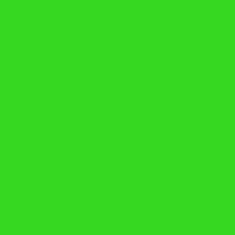

1/1 [==============================] - 0s 178ms/step
            Green



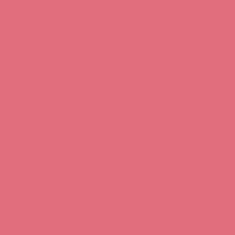

1/1 [==============================] - 0s 28ms/step
            Red



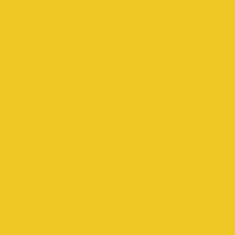

1/1 [==============================] - 0s 22ms/step
            Yellow



In [ ]:
# User input for number of images to be classified
n = int(input('Enter number of images to be classified: '))
print() #blank line for spacing
#predicting from loaded trained_model
for i in range(n) :
    img = create_image(235,235) #(235,235) is the (width,heigth) of the image
    rgb = get_pixel(img,200,200) # any pixel within the image is given
    rgb = np.asarray(rgb) #rgb to numpy array
    input_rgb = np.reshape(rgb, (-1,3)) #reshaping as per input to ANN model
    display(img)
    color_class_confidence = model.predict(input_rgb) # Output of layer is in terms of Confidence of the 11 classes
    color_index = np.argmax(color_class_confidence, axis=1) #finding the color_class index from confidence
    color = color_dict[int(color_index)]
    print('            ' + color)
    print()